In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential #type: ignore 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping #type: ignore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Dense, Activation, Dropout #type: ignore

# Load the dataset
performance = pd.read_csv(r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\Student_Performance.csv')

# Convert categorical variables to numerical (Example for 'Extracurricular Activities')
performance['Extracurricular Activities'] = performance['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Prepare features (X) and target (y)
X = performance.drop(columns=['Performance Index'])  # Features
y = performance['Performance Index']  # Target

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Normalize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the model for regression
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(1))  # Output should be 1 for regression

# Compile the model for regression
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Implement Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=60, batch_size=32, validation_split=0.1,callbacks=[early_stopping])

# Evaluate the model on test data
loss, mse = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Mean Squared Error: {mse:.4f}")

# Predict on test data
y_pred = model.predict(x_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R-squared:", r2)


c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1844.7515 - mean_squared_error: 1844.7515 - val_loss: 39.3095 - val_mean_squared_error: 39.3095
Epoch 2/60
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 102.5695 - mean_squared_error: 102.5695 - val_loss: 25.6657 - val_mean_squared_error: 25.6657
Epoch 3/60
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 81.9533 - mean_squared_error: 81.9533 - val_loss: 15.5289 - val_mean_squared_error: 15.5289
Epoch 4/60
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.2033 - mean_squared_error: 72.2033 - val_loss: 11.9366 - val_mean_squared_error: 11.9366
Epoch 5/60
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.0847 - mean_squared_error: 67.0847 - val_loss: 11.0116 - val_mean_squared_error: 11.0116
Epoch 6/60
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 66.4064 - mean_squared_error: 66.4064 - val_loss: 8.0702 - val_mean_squared_error: 8.0702
Epoch 7/60
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.3673 - mean_squared_e

In [2]:
for i in range(10):
    print(f"Sample {i + 1}: Predicted = {y_pred[i][0]:.2f}, Actual = {y_test.values[i]}")

Sample 1: Predicted = 65.82, Actual = 65.0
Sample 2: Predicted = 48.02, Actual = 51.0
Sample 3: Predicted = 36.82, Actual = 35.0
Sample 4: Predicted = 96.98, Actual = 97.0
Sample 5: Predicted = 85.16, Actual = 87.0
Sample 6: Predicted = 56.04, Actual = 54.0
Sample 7: Predicted = 50.68, Actual = 52.0
Sample 8: Predicted = 47.06, Actual = 50.0
Sample 9: Predicted = 54.47, Actual = 56.0
Sample 10: Predicted = 41.47, Actual = 40.0


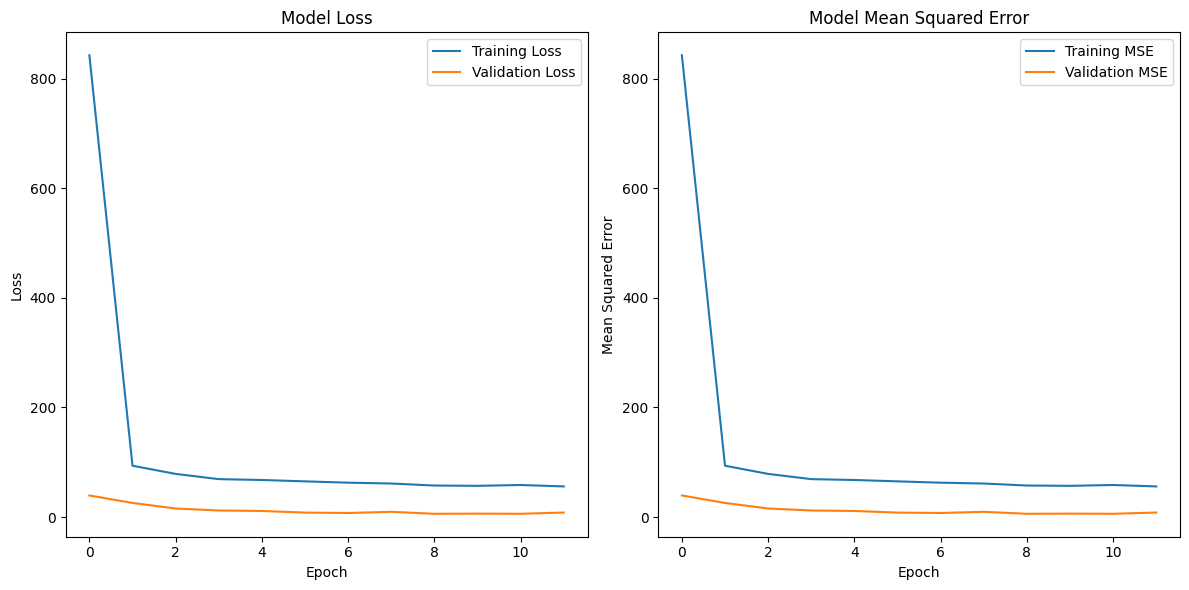

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])

# Plot training & validation MSE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE', 'Validation MSE'])

plt.tight_layout()
plt.show()


In [6]:
# Function to preprocess user input
def preprocess_input(hours_studied, prev_scores, extra_activities, sleep_hours, question_papers):
    extra_activities = 1 if extra_activities.lower() == 'yes' else 0
    input_data = pd.DataFrame([[hours_studied, prev_scores, extra_activities, sleep_hours, question_papers]],
                              columns=['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'])
    input_data = scaler.transform(input_data)
    return input_data

# Collect user input
hours_studied = float(input("Enter Hours Studied: "))
prev_scores = float(input("Enter Previous Scores: "))
extra_activities = input("Participate in Extracurricular Activities (Yes/No): ")
sleep_hours = float(input("Enter Sleep Hours: "))
question_papers = float(input("Enter Sample Question Papers Practiced: "))

# Preprocess the input data
input_data = preprocess_input(hours_studied, prev_scores, extra_activities, sleep_hours, question_papers)

# Make prediction
prediction = model.predict(input_data)
print(f"Predicted Performance Index: {prediction} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Performance Index: [[89.06299]] %
